In [1]:
import os
import pandas as pd
import numpy as np

os.chdir('../spatialdm/')
from main import *
from plottings import *

In [2]:
datadir = '/home/yoyo/1_spatial/1_Tumor/data/'

In [9]:
spatialcoord = pd.read_csv(datadir+'spatialcoord.csv', index_col=0)
spatialcoord.columns = ['x', 'y']
spatialcoord.head()

,x,y
1,15,7
2,16,7
3,17,7
4,18,7
5,13,8


In [10]:
exp=pd.read_csv(datadir + 'logcounts.csv',header=0,index_col=0)
exp = exp.transpose()
exp.index = spatialcoord.index
exp.head()

,PSME2,CUEDC1,RPLP1,TM9SF3,DEF8,RPL37A,NELL1,MFGE8,AIP,TSC22D3,...,TREM1,C2CD4A,TAF1L,PEBP4,BCL2L15,MYBPC2,RHOD,PPEF1,CKMT2,PGM5P2
1,1.813059,0.000000,4.775871,0.0,0.000000,5.177683,1.813059,1.813059,1.174363,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,5.436410,0.0,0.000000,5.436410,0.000000,3.427919,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,5.330760,0.0,0.000000,5.532423,0.000000,2.815122,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,1.755626,5.452236,0.0,1.755626,5.371711,2.524428,3.023288,1.755626,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,5.327188,0.0,0.000000,3.671727,0.000000,3.142286,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## SpatialDM permutation approach

In [ ]:
my_sample = SpatialDM(exp, spatialcoord)     # load spatial data

my_sample.weight_matrix(l=1.2, cutoff=0.2, single_cell=False) # weight_matrix by rbf kernel

In [86]:
_p=my_sample.global_res['perm_pval']

In [89]:
_p.values.shape

(946,)

In [88]:
fdrcorrection(_p.values)[1]


array([0.07276923, 0.81971897, 0.69219512, 0.63994118, 1.        ,
       1.        , 0.12783784, 0.90469854, 1.        , 0.93319149,
       0.84464286, 1.        , 0.85620309, 0.7844878 , 0.        ,
       0.        , 0.48039063, 0.        , 0.12783784, 1.        ,
       0.85620309, 0.87857451, 1.        , 0.        , 0.45774194,
       0.5619802 , 0.49051852, 0.83659864, 1.        , 0.72385224,
       0.83659864, 1.        , 0.60254777, 0.71013405, 1.        ,
       0.52738676, 0.63994118, 1.        , 0.31533333, 0.6680791 ,
       0.96384906, 0.37342105, 0.63994118, 0.93293886, 0.34557078,
       0.74243038, 1.        , 0.215     , 0.17304878, 0.6093865 ,
       1.        , 0.86562092, 0.24635417, 0.68132964, 1.        ,
       1.        , 0.63994118, 1.        , 0.75491272, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

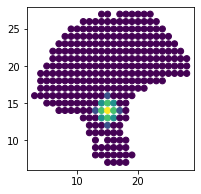

In [83]:
# visualize range of interaction
plt.figure(figsize=(3,3))
plt.scatter(my_sample.spatialcoord.x, my_sample.spatialcoord.y, c=my_sample.rbf_d[50])

In [17]:
my_sample.extract_lr('human', '/home/yoyo/1_spatial', min_cell=3)      # find overlapping LRs from CellChatDB

my_sample.spatialdm_global(100, select_num=None, method='permutation',nproc=50)     # global Moran selection

my_sample.sig_pairs(method='permutation', fdr=True, threshold=0.1)     # select significant pairs

my_sample.spatialdm_local(n_perm=100, method='permutation', select_num=None, nproc=50)     # local spot selection
my_sample.sig_spots(method='permutation', fdr=False, threshold=0.1)     # significant local spots

In [2]:
data_dir='/home/yoyo/1_spatial/1_Tumor/git_rep/SpatialDM/tutorial/output/'
# my_sample.save_spataildm(data_dir)
my_sample = read_spataildm(data_dir)

In [3]:
my_sample.ind = my_sample.global_res.index.values

In [4]:
my_sample.sig_spots(method='permutation', fdr=False, threshold=0.1)

In [ ]:
# my_sample.local_method = 'permutation'

## Visualize pair(s)

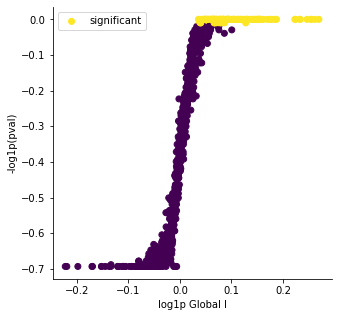

In [12]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(np.log1p(my_sample.global_I), -np.log1p(my_sample.global_res.perm_pval), c =my_sample.global_res.selected)
plt.xlabel('log1p Global I')
plt.ylabel('-log1p(pval)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(['significant'], loc='upper left')

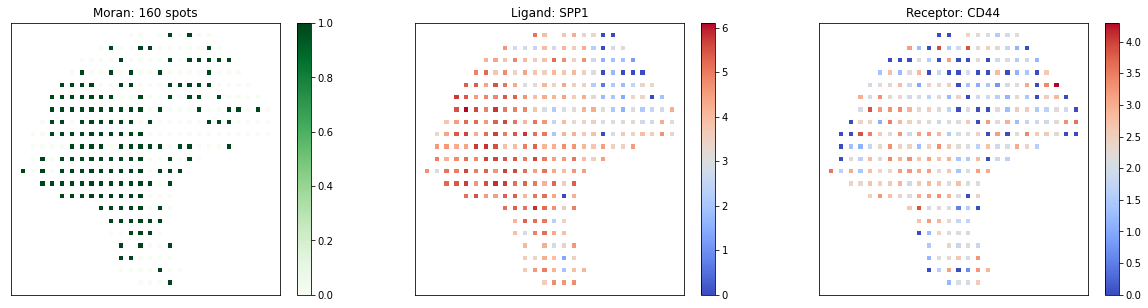

In [79]:
plot_pairs(my_sample, ['SPP1_CD44'])

## Spatial Clustering of Local Spots

In [17]:
import NaiveDE
import SpatialDE

In [22]:
# SpatialDE code
bin_spots = my_sample.selected_spots.astype(int)[my_sample.n_spots>2]

results = SpatialDE.run(my_sample.spatialcoord, bin_spots.transpose())

histology_results, patterns = SpatialDE.aeh.spatial_patterns(my_sample.spatialcoord, bin_spots.transpose(),
                                                             results, C=6, l=3,
                                                             verbosity=1)

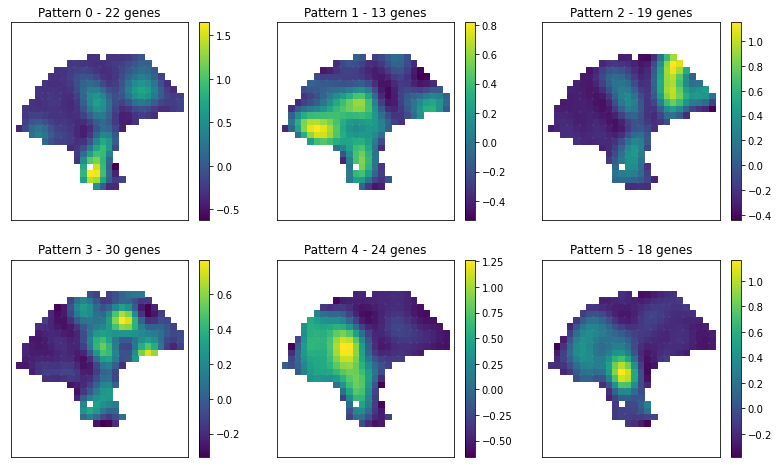

In [28]:
plt.figure(figsize=(18/4*3,8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.scatter(my_sample.spatialcoord['x'], my_sample.spatialcoord['y'], marker = 's',c=patterns[i], s=35);
    plt.axis('equal')
    plt_util('Pattern {} - {} genes'.format(i, histology_results.query('pattern == @i').shape[0] ))
#     plt.colorbar(ticks=[])
#     plt.savefig('SpatialDE_patterns.pdf') #2 # new dfb


In [29]:
dic=dict()
for i in histology_results.sort_values('pattern').pattern.unique():
    dic['Pattern_{}'.format(i)]=histology_results.query('pattern == @i').sort_values('membership')['g'].values

In [71]:
compute_pathway(my_sample, dic)

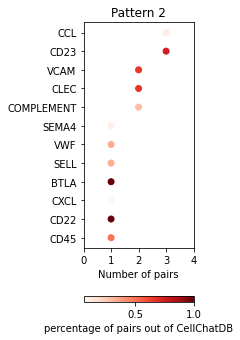

In [75]:
dot_path(my_sample, 2)

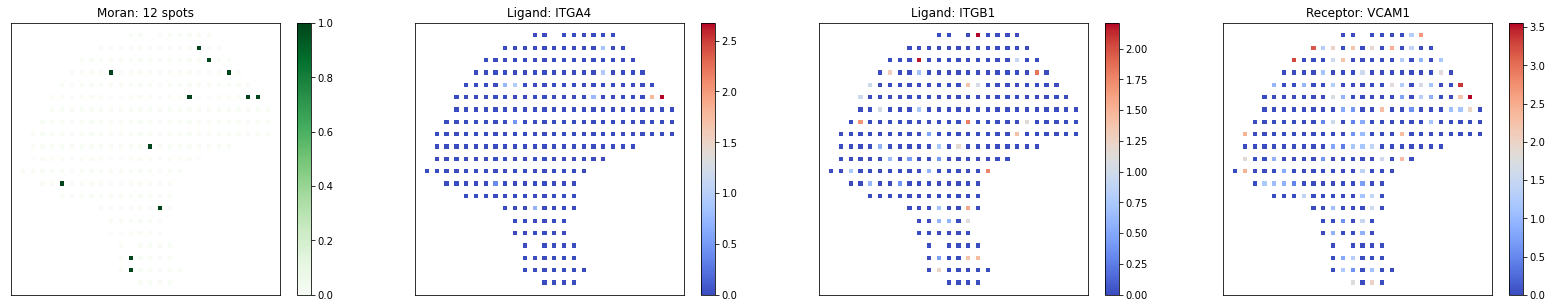

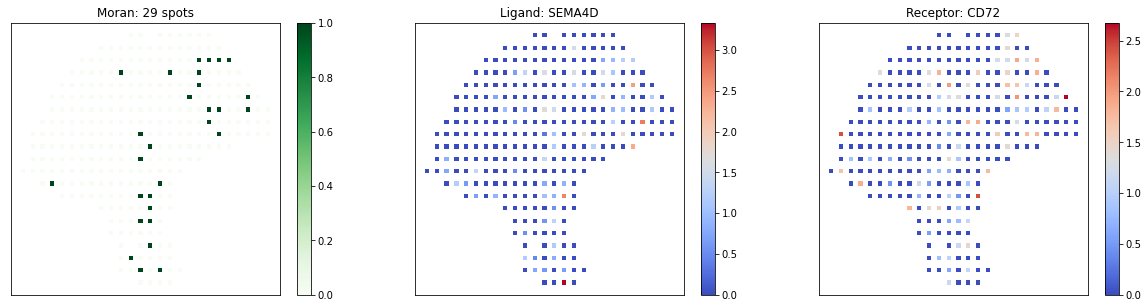

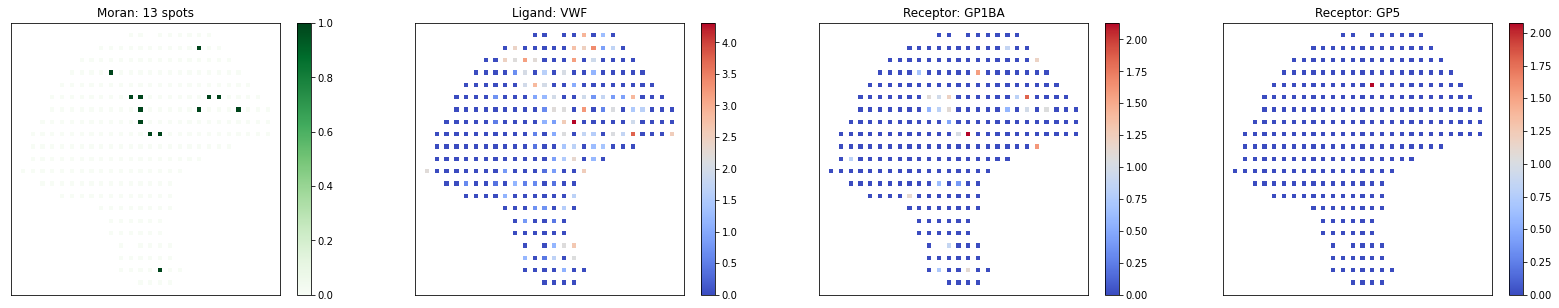

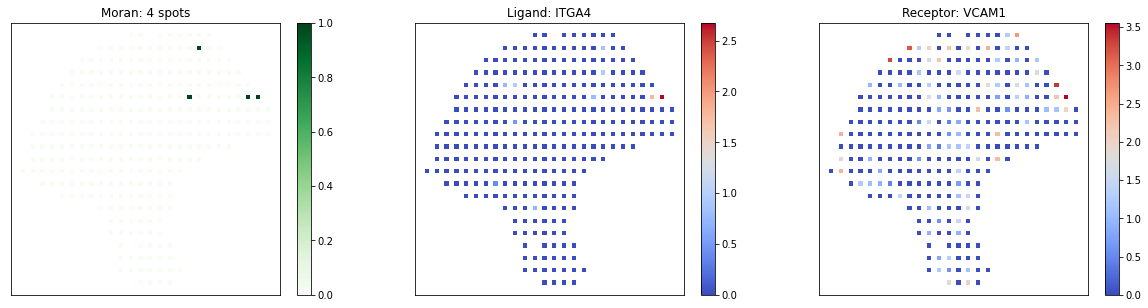

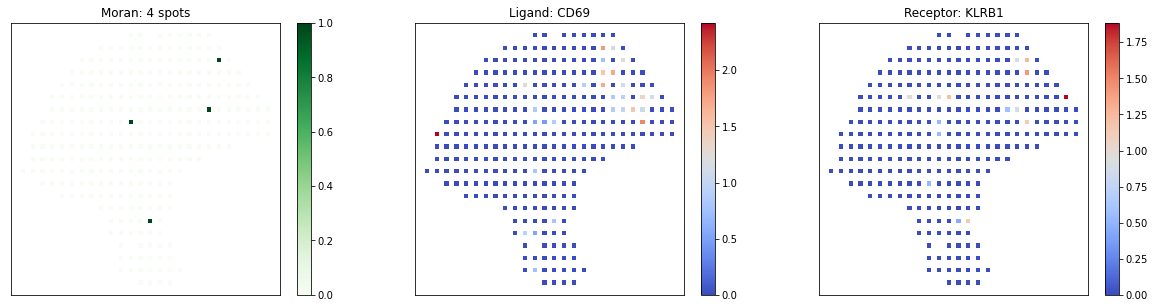

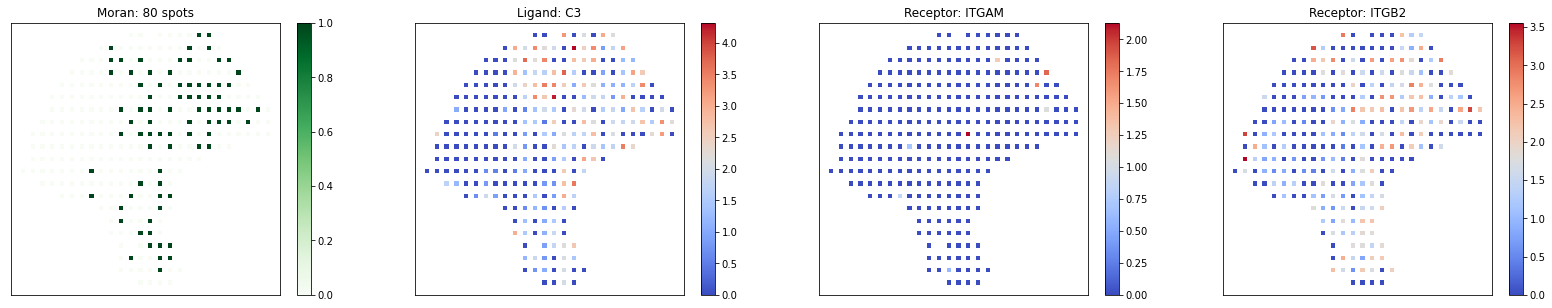

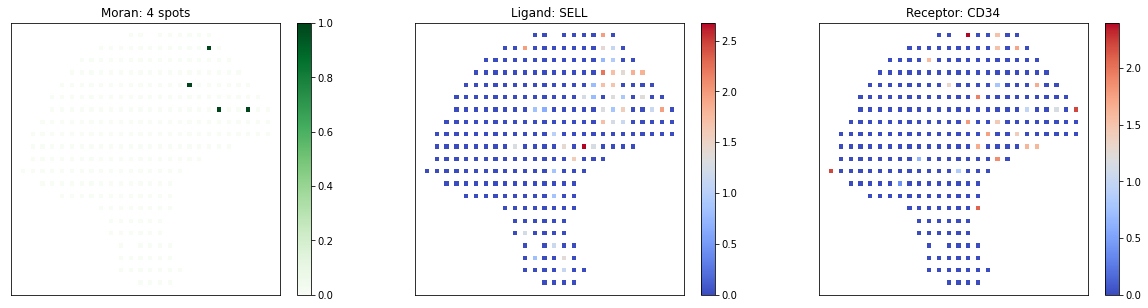

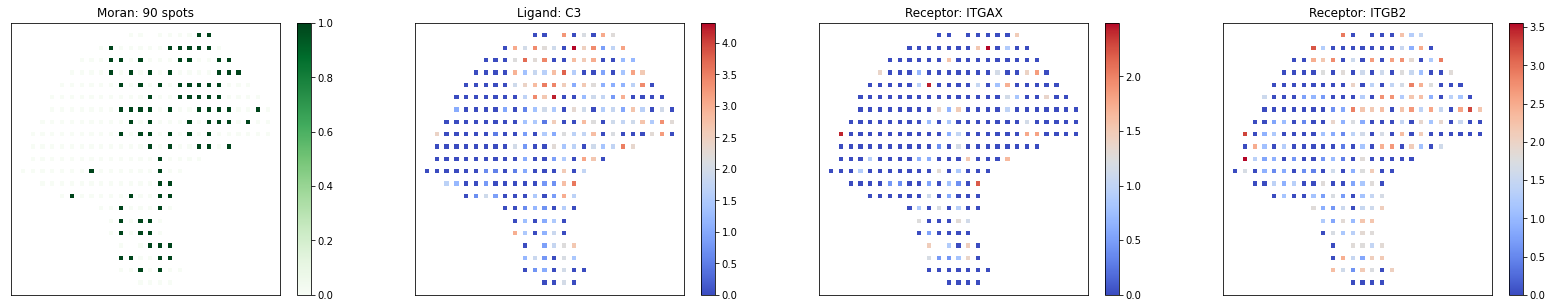

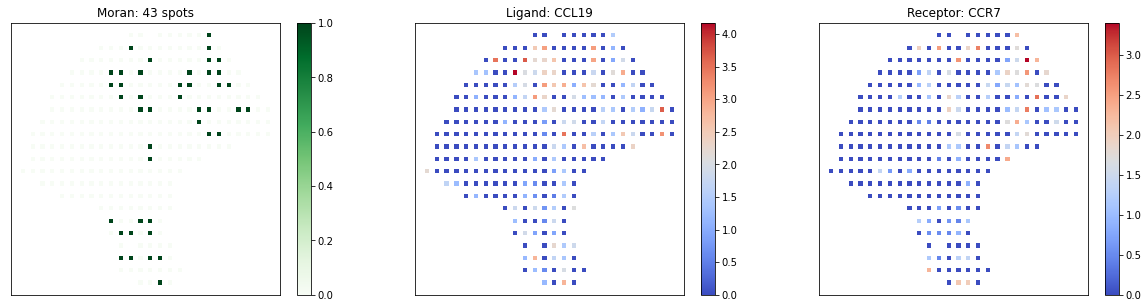

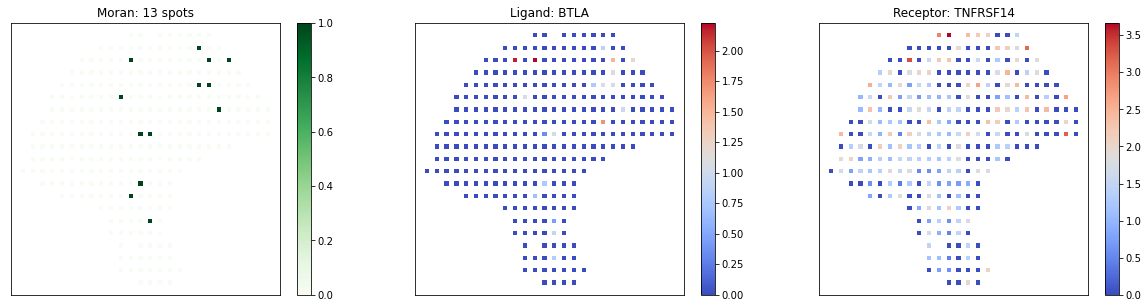

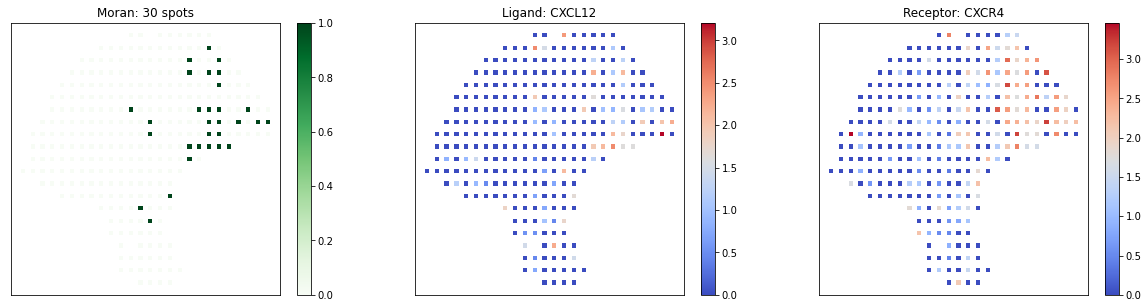

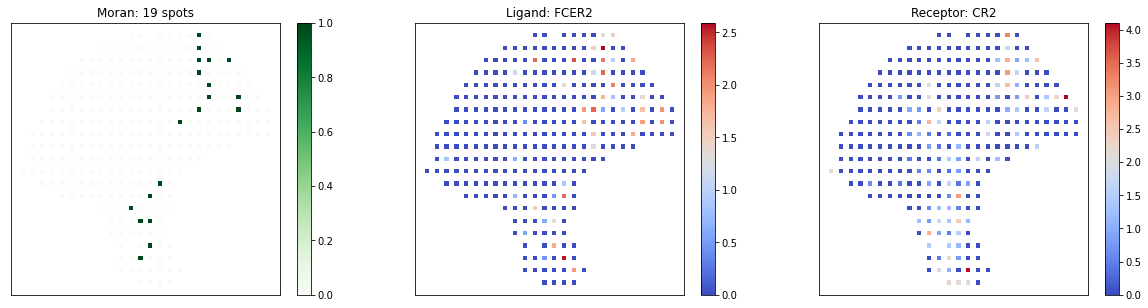

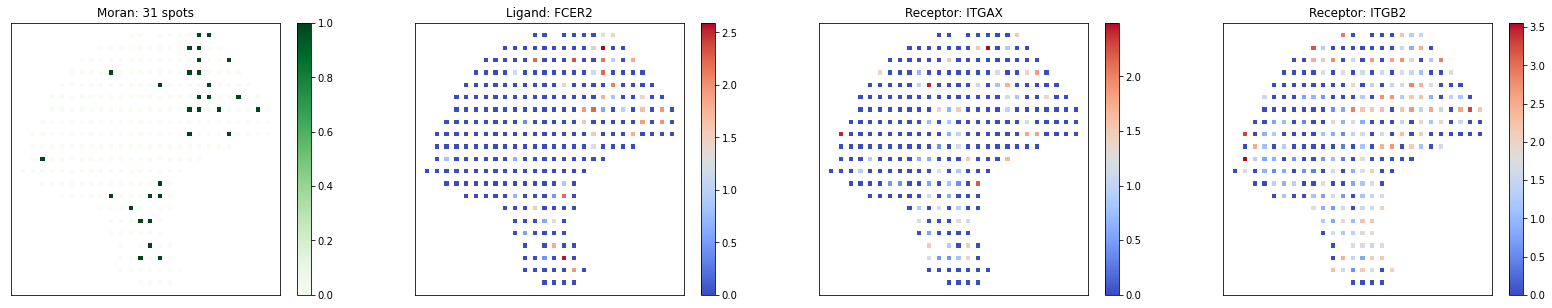

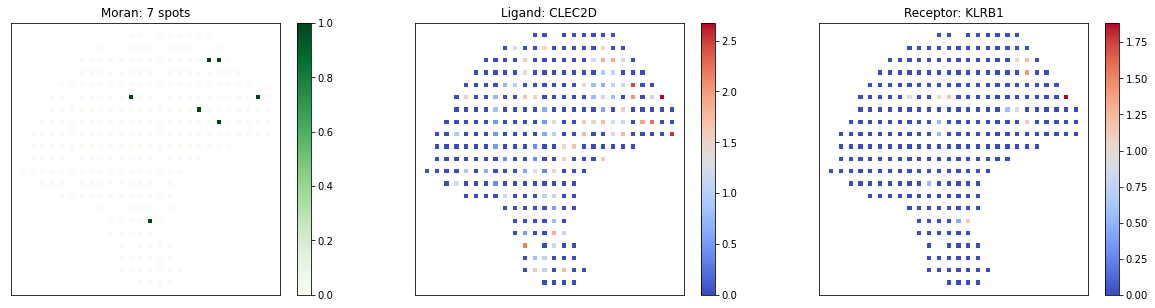

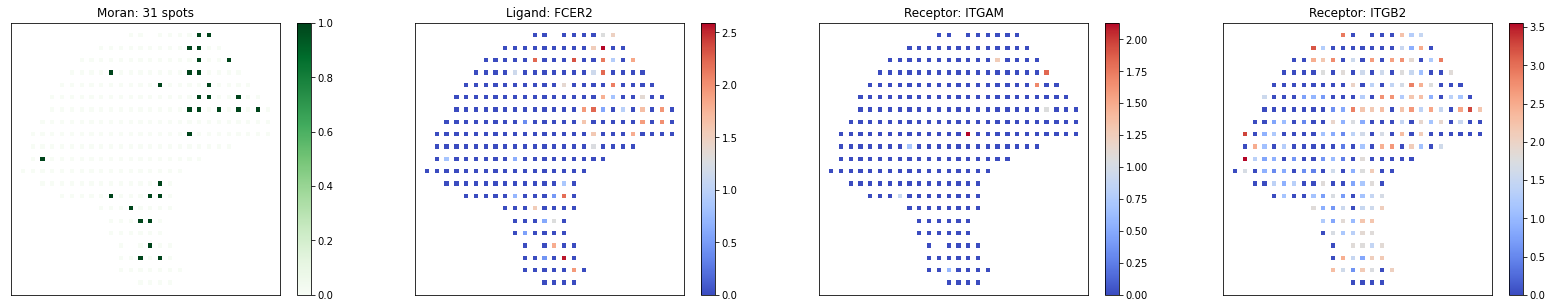

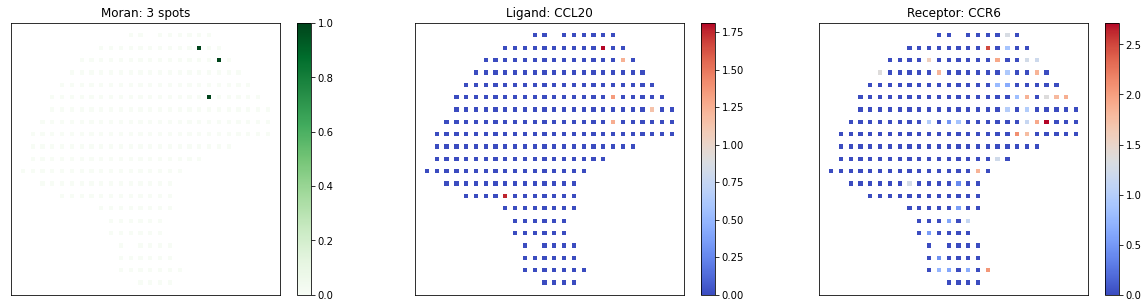

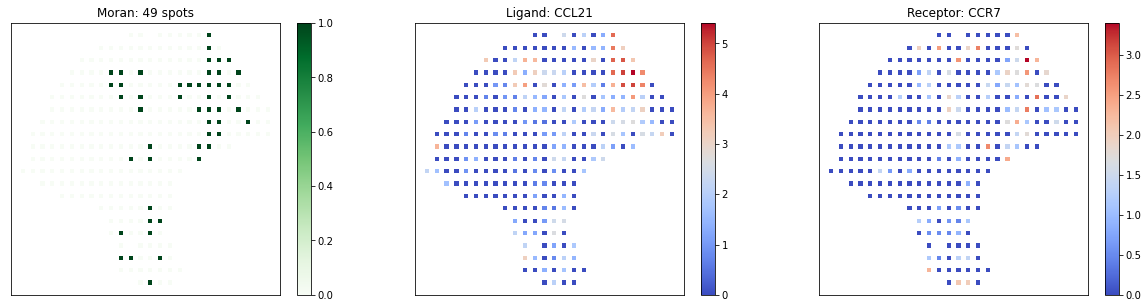

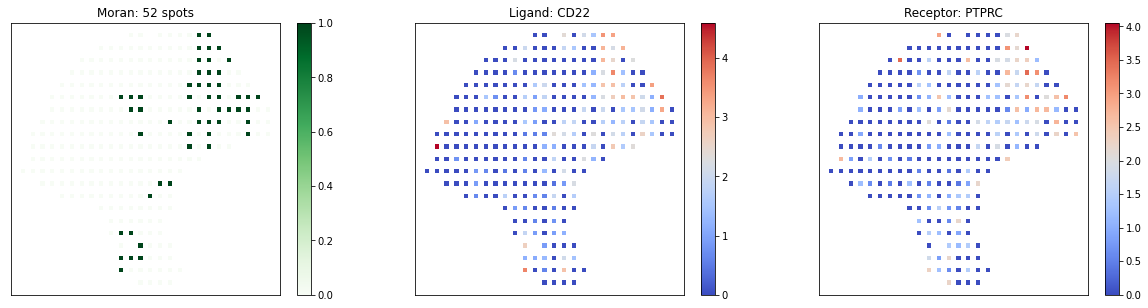

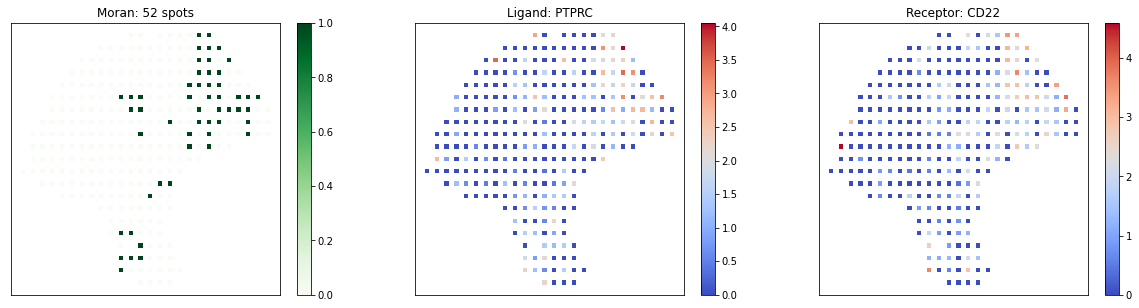

In [76]:
# visualize pattern 2 pairs
plot_pairs(my_sample, dic['Pattern_2'])